In [51]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [37]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(220,220,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])

In [42]:
model.compile(loss = "categorical_crossentropy", optimizer= 'adam', metrics=['accuracy'])

In [43]:
train_datagen = ImageDataGenerator(rescale = 1./255. , zoom_range = 0.2)
test_datagen =  ImageDataGenerator(rescale = 1./255.,)
val_datagen = ImageDataGenerator(rescale = 1./255.,)

In [47]:
train_dir = "C:\\Users\\dhruv\\Downloads\\chest_xray\\train"
test_dir = "C:\\Users\\dhruv\\Downloads\\chest_xray\\test"
val_dir = "C:\\Users\\dhruv\\Downloads\\chest_xray\\val"
train_generator = train_datagen.flow_from_directory(train_dir , batch_size = 20, class_mode = 'categorical' , target_size = (220,220))
test_generator = test_datagen.flow_from_directory(test_dir , batch_size = 20, class_mode = 'categorical' , target_size = (220,220))
valid_generator = val_datagen.flow_from_directory(val_dir , batch_size = 20, class_mode = 'categorical' , target_size = (220,220))

Found 4023 images belonging to 3 classes.
Found 383 images belonging to 3 classes.
Found 400 images belonging to 3 classes.


In [48]:
history = model.fit_generator(train_generator, validation_data=valid_generator, steps_per_epoch = 100, epochs=20)

Epoch 1/20
100/100 [==============================] - 285s 3s/step - loss: 6.4026 - accuracy: 0.7186 - val_loss: 154.4582 - val_accuracy: 0.3525
Epoch 2/20
100/100 [==============================] - 286s 3s/step - loss: 1.1957 - accuracy: 0.8315 - val_loss: 0.6181 - val_accuracy: 0.8000
Epoch 3/20
100/100 [==============================] - 294s 3s/step - loss: 0.6084 - accuracy: 0.8805 - val_loss: 0.6918 - val_accuracy: 0.7200
Epoch 4/20
100/100 [==============================] - 295s 3s/step - loss: 0.4923 - accuracy: 0.8865 - val_loss: 1.6383 - val_accuracy: 0.7850
Epoch 5/20
100/100 [==============================] - 292s 3s/step - loss: 0.3772 - accuracy: 0.9027 - val_loss: 0.4770 - val_accuracy: 0.7425
Epoch 6/20
100/100 [==============================] - 303s 3s/step - loss: 0.2769 - accuracy: 0.9215 - val_loss: 3.7271 - val_accuracy: 0.7525
Epoch 7/20
100/100 [==============================] - 286s 3s/step - loss: 0.2794 - accuracy: 0.9259 - val_loss: 1.8291 - val_accuracy: 0.82

In [49]:
accuracy = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

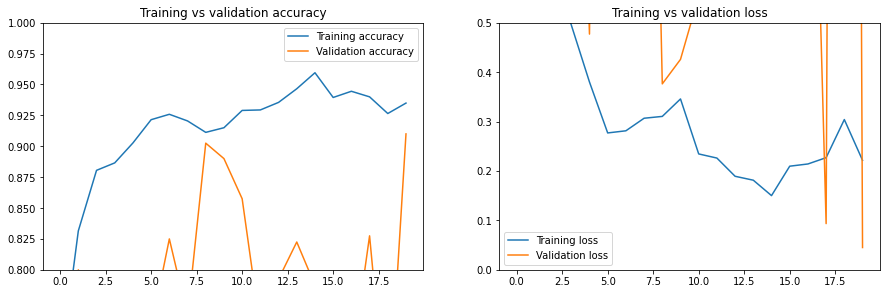

In [52]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.ylim(0.8, 1)
plt.legend()
plt.title("Training vs validation accuracy")


plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.ylim(0, 0.5)
plt.legend()
plt.title("Training vs validation loss")

plt.show()